<a href="https://colab.research.google.com/github/SanghunOh/study_machinglearning/blob/main/codes/sanghunoh/7%EA%B0%95_%EA%B5%B0%EC%A7%91%ED%99%94_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* 사용 이유
  - 데이터에 클래스 라벨이 없는 경우
  - 클래스 라벨링에 비용이 많이 드는 경우

# K-menas 알고리즘
데이터 $ x_j(j=1,..., N) $
1. 초기화 : 각 cluster 당 임의로 대표벡터 부여 $ m_k $
2. 데이터 그룹핑 : 대표 벡터들과 거리 측정해 라벨링
$ C_k=\{x_j | d(x_j, m_k) <= d(x_j, m_i), i=1,..., K\} $
3. 대표벡터 수정 : 
$ 
\begin{align}
  m_k^{new} &= \frac{1}{|C_k|} \sum_{x_j ∈ C_k} x_j
\end{align}
$
4. 반복 여부 결정 : 2~3을 반복 여부, $ m_k와 m_k^{new} $ 차이로 판단

## 고려 사항
- 좋은 군집을 확실히 보장 ?
- 초기 대표벡터 설정이 군집화 성능 영향 ?
- 적정한 K 값 선택 ?

### 데이터 생성

## 목적 함수
$
\begin{align} 
  J &= \sum_{n=1}^N \sum_{i=1}^N r_{ni} ||x_n - m_i||^2 \\
  r_{ni} &= \{ \begin{array}{c1}   
              1 & if & i=argmin_j || x_n - m_j ||^2 \\
              0 & otherwise
            \end{array}
\end{align}
$

In [1]:
import numpy as np
np.random.seed(50)

In [2]:
row_count = 50
cluster_1 = np.random.randn(row_count, 2)
mean_2 = np.array([3,0])
cluster_2 = np.random.randn(row_count, 2) + mean_2
mean_3 = np.array([0,3])
cluster_3 = np.random.randn(row_count, 2) + mean_3

cluster_1.shape, cluster_2.shape, cluster_3.shape

((50, 2), (50, 2), (50, 2))

In [3]:
cluster_all = np.vstack([cluster_1, cluster_2, cluster_3])
cluster_all.shape

(150, 2)

###대표 백터 생성

In [4]:
kernel = 3
indices = np.random.randint(cluster_all.shape[0], size=3)
print(indices)
means = cluster_all[indices, :]
means

[ 46  47 115]


array([[ 0.72852289,  1.62174549],
       [ 1.52166225, -1.30677343],
       [-1.13832312,  3.56528891]])

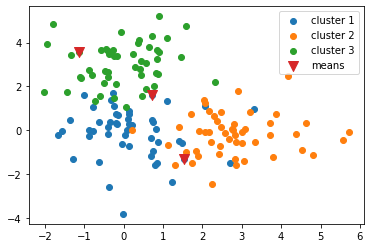

In [5]:
import matplotlib.pyplot as plt
plt.scatter(cluster_1[:,0], cluster_1[:,1], label='cluster 1')
plt.scatter(cluster_2[:,0], cluster_2[:,1], label='cluster 2')
plt.scatter(cluster_3[:,0], cluster_3[:,1], label='cluster 3')
plt.scatter(means[:,0], means[:,1], marker='v', s=100, label='means')
plt.legend()

###그룹핑과 대표벡터 계산

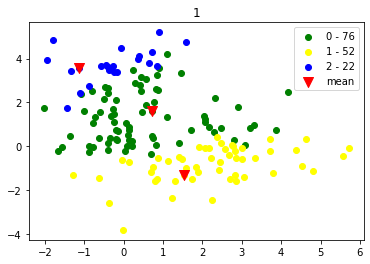

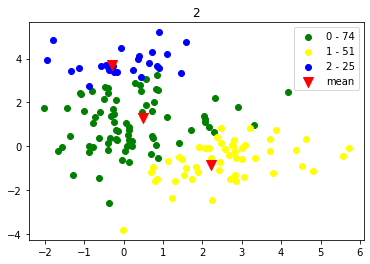

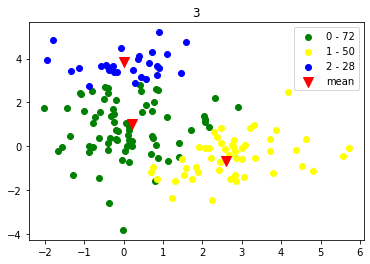

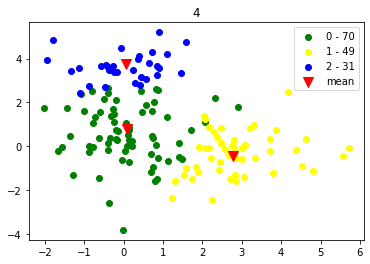

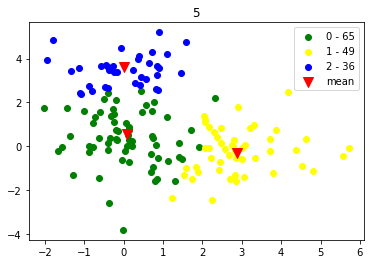

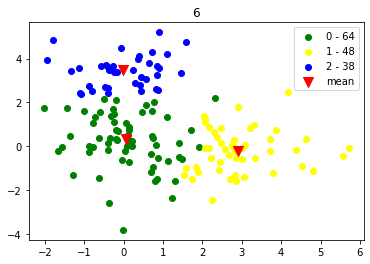

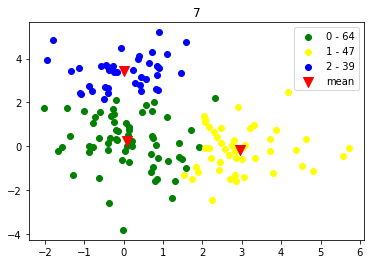

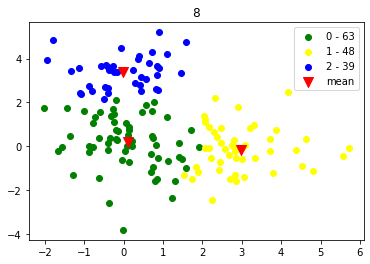

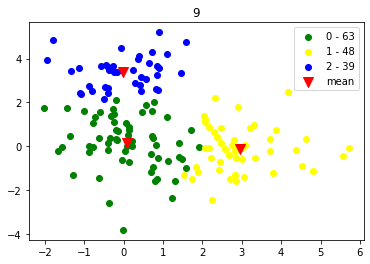

In [6]:
row_all_count = cluster_all.shape[0]
cmode = ["green", "yellow", "blue"]
from scipy.spatial import distance as dstn

# 군집화 위해 반복 수행
for iteration in range(10):
    plt.figure(iteration+1)
    cluster_label = np.zeros((row_all_count))

    # 모든 데이터와 각 cluster 대표 벡터와 비교
    for i in range(row_all_count):
        distance_measure = np.full((kernel), fill_value=0)
        for j in range(kernel):
            distance = dstn.euclidean(cluster_all[i, :], means[j, :])
            distance_measure[j] = distance
        # 거리가 가장 가까운 데이터 확인
        cluster_label[i] = np.argmin(distance_measure)
    # 대표 벡터 재 계산 위해 복사
    past_means = means.copy()
    # 계산 전 대표 벡터들 그래프 표시
    for j in range(kernel):
        cluster_label_mask = (cluster_label == j)
        cluster_label_cnt = cluster_all[cluster_label_mask].shape[0]
        plt.scatter(cluster_all[cluster_label_mask, 0],
                    cluster_all[cluster_label_mask, 1], label='{} - {}'.format(j,cluster_label_cnt), color=cmode[j])
        means[j,:] = np.mean(cluster_all[cluster_label_mask, :], axis=0)    # 새로운 벡터 계산
    # 계산 전 대표 벡터들 그래프 표시
    plt.scatter(past_means[:, 0], past_means[:, 1], marker='v', s=100, color='red', label='mean')
    pass
    plt.title(iteration+1)
    plt.legend()
    plt.show()

    # 평균 벡터 변화 없으면 정지
    if (np.array_equal(means, past_means)):
        break


# 계층스러운 군집화 알고리즘
- 병합 방법 : 가까운 군집끼리 순서 있게 합침. $N-1$
- 분할 방법 : 모든 데이터를 하나로 보고, 기준 따라 나눔. $ 2^{n-1}-1 $, 비실용스러움.

## 병합 방법 : Dendrogram
데이터 집합 $ \{ x_1, x_2, ..., x_n \}$
1. N개 군집 만듬 : $ \{ C_1, C_2, ..., C_n \}$
2. 군집 간 거리 계산해 가까운 군집 합침 :
$
\begin{align}
  d(C_i, C_j) &= min_{x_i \in C_i, x_j \in C_j} \{ d(x_i, x_j \} \\
  C_ij &= C_i ∪ C_j  
\end{align}
$
3. cluster가 하나 일 때까지 2 과정 반복

## 고려 사항
- 군집 간 거리 
  + 최단연결법 : 고립된 군집 찾는데 유용
  + 최장연결법 : 응집된 군집 찾는데 유용
  + 중심연결법 : 특이값에 특화됨
  + 평균연결법 : 작은 분산을 가지는 군집 형성
  + Ward's 방법 : 비슷한 크기 군집 시 유용
- 적합한 군집 수 결정 : 클러스터 수가 일정 동안 유지되는 지점 선택